In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5168 - accuracy: 0.4456 - val_loss: 1.2607 - val_accuracy: 0.5457
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1512 - accuracy: 0.5919 - val_loss: 1.0730 - val_accuracy: 0.6246
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0070 - accuracy: 0.6467 - val_loss: 1.0088 - val_accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9094 - accuracy: 0.6827 - val_loss: 0.9463 - val_accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8461 - accuracy: 0.7043 - val_loss: 0.9267 - val_accuracy: 0.6861
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7874 - accuracy: 0.7246 - val_loss: 0.8869 - val_accuracy: 0.6944
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7388 - accuracy: 0.7412 - val_loss: 0.8825 - val_accuracy:

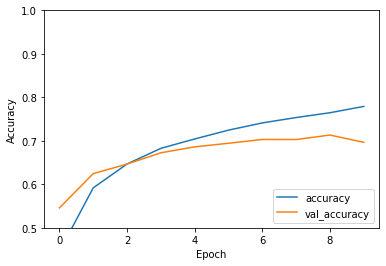

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'預測: {np.argmax(model.predict(test_images), axis=-1)[:10]}')
print(f'實際: {test_labels.flatten()[:10]}')

313/313 - 1s - loss: 0.8992 - accuracy: 0.6965
預測: [3 8 8 0 4 6 1 6 3 1]
實際: [3 8 8 0 6 6 1 6 3 1]


In [7]:
model.save('save/cifar10.h5')

In [8]:
#load model and evaluate
loadModel = models.load_model('save/cifar10.h5')
loadModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
test_loss, test_acc = loadModel.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8992 - accuracy: 0.6965: 0s - loss: 0.9014 - accura
